For this project I have looked at estimating opening prices of stocks. More specifically, I will be looking into how changing dropouts effects the predicted stock prices. To do this I have used code from the homeworks and some I made using sklearn and keras.
The data I have used is from apples stock data from 2010 to 2020, taken from Kaggle: https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data

I have done the project on google colab so line 4 might be removed depending on how you are using python. I will attach the csv file with this ipynb file.

In [83]:
import tensorflow as tf
from autograd import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [84]:
pip install scikit-learn

In [85]:
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras import Input

In [87]:
from google.colab import files
uploaded = files.upload()

Saving HistoricalQuotes.csv to HistoricalQuotes (3).csv


In [88]:
df = pd.read_csv('HistoricalQuotes.csv') #using pandas makes it a bit easier manipulating datasets

In [89]:
df.shape

(2518, 6)

In [90]:
df.rename(columns = {' Open':'Open'}, inplace = True) #excel data had weird columns so i had to rename them
df = df.replace({'\$':''}, regex = True) #this is to remove $ sign in front of the open data
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.1,286,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.5
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23


In [91]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [92]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):]) #these two lines split the data into training and testing sets

In [93]:
scaler = MinMaxScaler(feature_range=(0,1)) #scales features into a range between 0 and 1 
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [94]:
def create_dataset(df): #creates a dataset used to fit training and test data for x and y values according to the shape of the csv data
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [95]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [96]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # need to reshape as Sequential() expects 3 dimensional input not 2
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [97]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [98]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [99]:
model.compile(loss='mean_squared_error', optimizer='adam') #Use of adam due to stochastic nature of stocks

In [100]:
history = model.fit(x_train, y_train, validation_split = 0.1, batch_size= 256, epochs = 50)

Epoch 1/50
7/7 [==============================] - 33s 2s/step - loss: 0.0479 - val_loss: 8.7921e-04
Epoch 2/50
7/7 [==============================] - 7s 862ms/step - loss: 0.0151 - val_loss: 0.0102
Epoch 3/50
7/7 [==============================] - 6s 860ms/step - loss: 0.0074 - val_loss: 9.3701e-04
Epoch 4/50
7/7 [==============================] - 6s 853ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 5/50
7/7 [==============================] - 6s 861ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 6/50
7/7 [==============================] - 6s 856ms/step - loss: 0.0020 - val_loss: 4.4518e-04
Epoch 7/50
7/7 [==============================] - 6s 846ms/step - loss: 0.0017 - val_loss: 3.6276e-04
Epoch 8/50
7/7 [==============================] - 6s 847ms/step - loss: 0.0018 - val_loss: 3.5375e-04
Epoch 9/50
7/7 [==============================] - 6s 856ms/step - loss: 0.0016 - val_loss: 3.8635e-04
Epoch 10/50
7/7 [==============================] - 6s 858ms/step - loss: 0.0015 - val_loss: 4.48

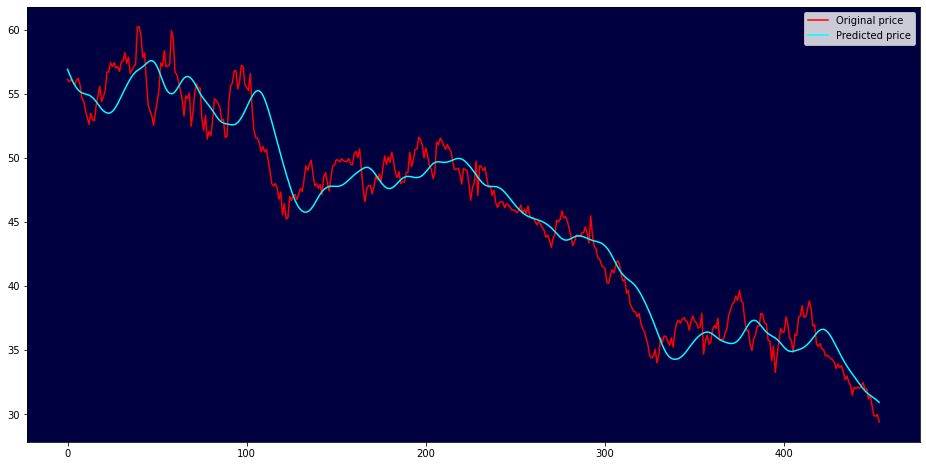

In [101]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #need to do this due to MinMaxScaler
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8)) #make the plot
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend();

In [102]:
val_loss_1 = history.history['val_loss']

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [104]:
tf.random.set_seed(0)

In [134]:
model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(x_train.shape[1], )))
model.add(Dropout(0.4))
model.add(Dense(30,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))
#Use a different dropout and loss to see if there is any change in the prediction.
'''
model = Sequential([
    Dense(units = 512, activation = 'relu', input_shape=(x_train.shape[1], )),
    Dense(units = 10, activation = 'softmax'),
    Dense(units = 1, activation = 'sigmoid')
])'''
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split = 0.1, batch_size= 256, epochs = 50)

Epoch 1/50
7/7 [==============================] - 1s 37ms/step - loss: 1.6356 - accuracy: 0.0000e+00 - val_loss: 0.7244 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 1.6498 - accuracy: 0.0000e+00 - val_loss: 0.7148 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 1.5994 - accuracy: 0.0000e+00 - val_loss: 0.7054 - val_accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 1.6459 - accuracy: 5.6593e-04 - val_loss: 0.6967 - val_accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 1.6258 - accuracy: 5.6593e-04 - val_loss: 0.6883 - val_accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 1.6349 - accuracy: 0.0000e+00 - val_loss: 0.6803 - val_accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 1.6000 - accuracy: 0.0000e+00 - val_loss: 0.6723 - va

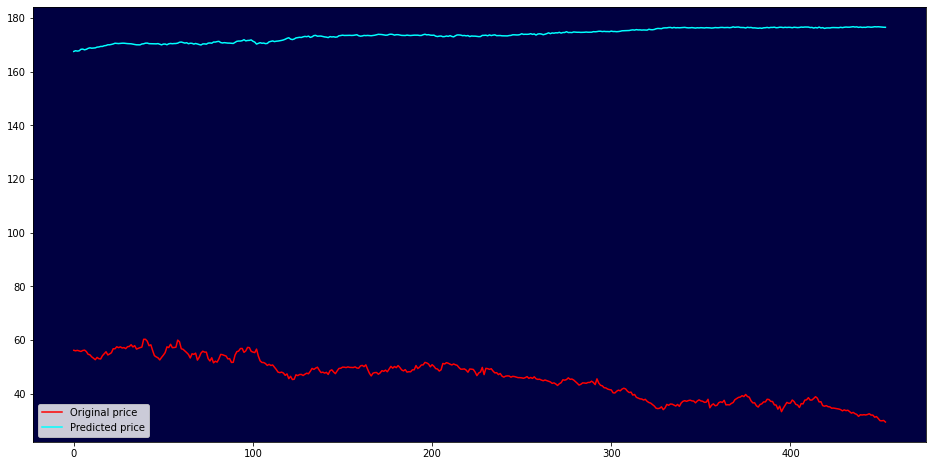

In [135]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend();

#Prediction value is way higher than original pricing. This method is wildly inaccurate.

In [107]:
val_loss_2 = history.history['val_loss']

In [123]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.3))
model.add(Dense(units=1))

In [124]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [130]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split = 0.1, batch_size= 256, epochs = 50)

Epoch 1/50
7/7 [==============================] - 18s 1s/step - loss: 1.0268 - accuracy: 5.6593e-04 - val_loss: 0.4209 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 6s 886ms/step - loss: 0.7371 - accuracy: 5.6593e-04 - val_loss: 0.3831 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 6s 873ms/step - loss: 0.6523 - accuracy: 5.6593e-04 - val_loss: 0.3653 - val_accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 6s 860ms/step - loss: 0.5940 - accuracy: 5.6593e-04 - val_loss: 0.3569 - val_accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 6s 940ms/step - loss: 0.5554 - accuracy: 5.6593e-04 - val_loss: 0.3551 - val_accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 0.5314 - accuracy: 5.6593e-04 - val_loss: 0.3584 - val_accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 10s 1s/step - loss: 0.5217 - accuracy: 5.6593e-04 - val_loss: 0.36

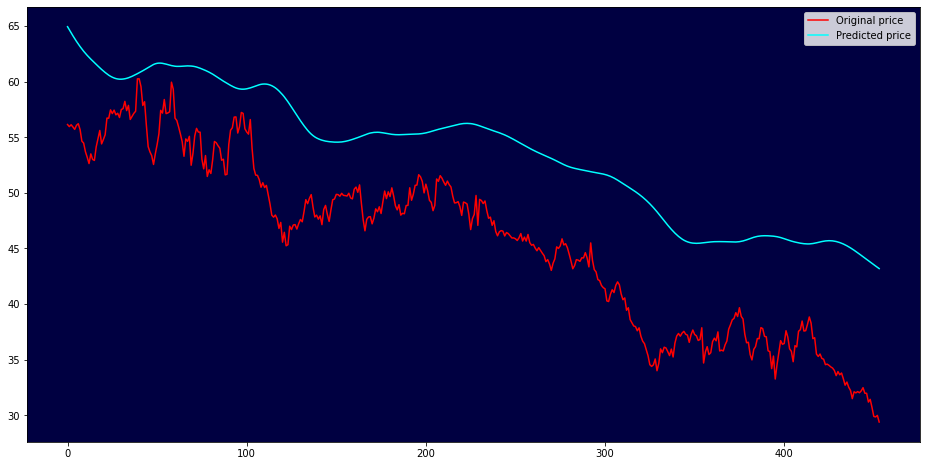

In [131]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend();

#The predicted price using this dropout shows a high approximation compared to the original price of the stock. This is still not as accurate as the first
#method used.

In [132]:
val_loss_3 = history.history['val_loss']

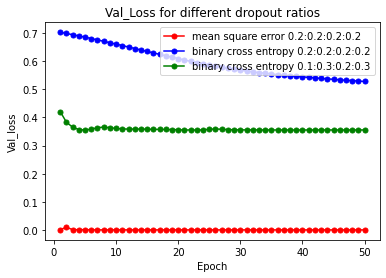

In [136]:
x_values = range(1,len(history.history['val_loss'])+1)
plt.ylabel('Val_loss')
plt.xlabel('Epoch')
plt.plot(x_values,val_loss_1, color = 'red', marker = '.', markersize = '10', label = 'Method 1')
plt.plot(x_values,val_loss_2, color = 'blue', marker = '.', markersize = '10', label = 'Method 2')
plt.plot(x_values,val_loss_3, color = 'green', marker = '.', markersize = '10', label = 'Method 3')
plt.legend()
plt.title('Val_Loss for different dropout ratios')
plt.show();

The graph above displays the Val_loss for each method. The first method (red), which was the most accurate has negligble val_loss. The blue graph which represents method 2 shows a smooth descent curve but it doesnt reach 0. The green graph shows a constant val_loss, much like method 1 but this represents a high approximation of the original data. 

Graph 1 is the most accurate as it shows a constant val_loss of approximately zero.